В рамках данного соревнования предстоит построить систему предсказывающую один из важнейших факторов характеризующих спрос. Данный фактор очень важен для выбора оптимальной стратегии ценообразования, маркетинга и управления складскими запасами компании 21vek.by.

Чтаем датасет

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Соревнование\train.csv')

In [8]:
df

,index,id,g1,g2,relative_date_number,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,70,1705.0;13221.0;1.0,1705,13221,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
1,71,1705.0;13221.0;2.0,1705,13221,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
2,72,1705.0;13221.0;3.0,1705,13221,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
3,73,1705.0;13221.0;4.0,1705,13221,4,0.0,0.0,0.0,0.0,0.000001,0.000005,0.000016,0.000008,4.501503e-07,0.0,0.000003,0.000094,1.0
4,74,1705.0;13221.0;5.0,1705,13221,5,0.0,0.0,0.0,0.0,0.000003,0.000005,0.000047,0.000025,4.051353e-06,0.0,0.000003,0.000071,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391645,654215,697.0;17221.0;31.0,697,17221,31,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391646,654216,697.0;17221.0;32.0,697,17221,32,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391647,654217,697.0;17221.0;33.0,697,17221,33,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391648,654218,697.0;17221.0;34.0,697,17221,34,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0


В датасете нет пропусков, а также все признаки числовые

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391650 entries, 0 to 391649
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 391650 non-null  int64  
 1   id                    391650 non-null  object 
 2   g1                    391650 non-null  int64  
 3   g2                    391650 non-null  int64  
 4   relative_date_number  391650 non-null  int64  
 5   y                     391650 non-null  float64
 6   x1                    391650 non-null  float64
 7   x2                    391650 non-null  float64
 8   x3                    391650 non-null  float64
 9   x4                    391650 non-null  float64
 10  x5                    391650 non-null  float64
 11  x6                    391650 non-null  float64
 12  x7                    391650 non-null  float64
 13  x8                    391650 non-null  float64
 14  x9                    391650 non-null  float64
 15  

In [13]:
df['relative_date_number'].unique

<bound method Series.unique of 0          1
1          2
2          3
3          4
4          5
          ..
391645    31
391646    32
391647    33
391648    34
391649    35
Name: relative_date_number, Length: 391650, dtype: int64>

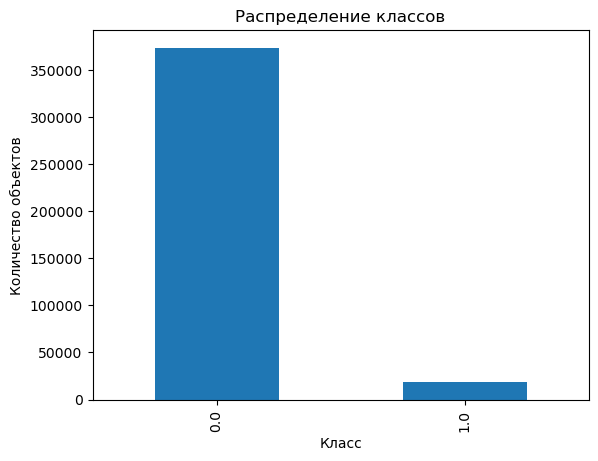

In [15]:
# Для pandas Series
y_series = pd.Series(df['y'])
y_series.value_counts().plot(kind='bar')
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Распределение классов')
plt.show()

Классы очень несбаласированны

In [18]:
numerical_features = list(df.columns[(df.dtypes == 'float64')])

In [20]:
# Оценка статистических характеристик данных
statistics = df.describe()
print("Статистические характеристики:")
print(statistics)

Статистические характеристики:
               index             g1             g2  relative_date_number  \
count  391650.000000  391650.000000  391650.000000         391650.000000   
mean   326473.166220     947.069526    9454.379893             18.000000   
std    189150.124798     500.262220    5366.549883             10.099518   
min        70.000000       1.000000       1.000000              1.000000   
25%    161437.250000     562.000000    4909.000000              9.000000   
50%    326584.500000     970.000000    9320.500000             18.000000   
75%    490366.750000    1372.000000   14102.000000             27.000000   
max    654219.000000    1822.000000   18692.000000             35.000000   

                   y             x1             x2             x3  \
count  391650.000000  391650.000000  391650.000000  391650.000000   
mean        0.046393       0.000313       0.000605       0.001052   
std         0.210336       0.008093       0.008962       0.007231   
min     

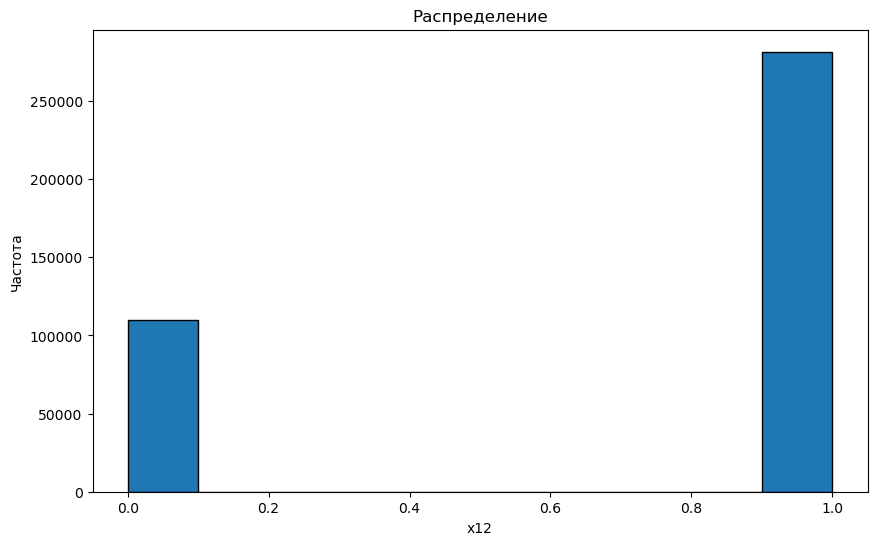

In [298]:
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.hist(df['x12'], bins=10, edgecolor='black')
plt.xlabel('x12')
plt.ylabel('Частота')
plt.title('Распределение')
plt.show()

<Axes: >

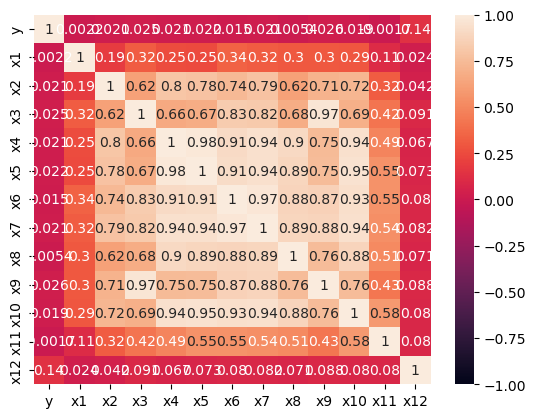

In [24]:
sns.heatmap(df[numerical_features].corr(), vmin=-1, vmax=1, annot=True)

In [26]:
df[numerical_features].corr()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
y,1.000000,0.002223,0.021181,0.025150,0.020878,0.021689,0.014643,0.020666,0.005398,0.026247,0.018806,-0.001723,0.137937
x1,0.002223,1.000000,0.186838,0.318376,0.252934,0.248530,0.342655,0.318676,0.296925,0.301704,0.289690,0.106134,0.024150
x2,0.021181,0.186838,1.000000,0.623423,0.803479,0.784207,0.735084,0.788523,0.617850,0.706708,0.722673,0.317167,0.042245
x3,0.025150,0.318376,0.623423,1.000000,0.661423,0.674246,0.829219,0.822277,0.679171,0.968664,0.688710,0.416442,0.090956
x4,0.020878,0.252934,0.803479,0.661423,1.000000,0.980826,0.908051,0.939383,0.900695,0.749519,0.943246,0.490030,0.067461
x5,0.021689,0.248530,0.784207,0.674246,0.980826,1.000000,0.914308,0.940915,0.888987,0.752582,0.951293,0.553568,0.072857
x6,0.014643,0.342655,0.735084,0.829219,0.908051,0.914308,1.000000,0.971793,0.877443,0.866344,0.930329,0.548550,0.080408
x7,0.020666,0.318676,0.788523,0.822277,0.939383,0.940915,0.971793,1.000000,0.886490,0.876622,0.943030,0.535955,0.081630
x8,0.005398,0.296925,0.617850,0.679171,0.900695,0.888987,0.877443,0.886490,1.000000,0.757291,0.880842,0.514250,0.070774
x9,0.026247,0.301704,0.706708,0.968664,0.749519,0.752582,0.866344,0.876622,0.757291,1.000000,0.756144,0.428663,0.087593


Между таргетом и признаками крайне низкая корреляция

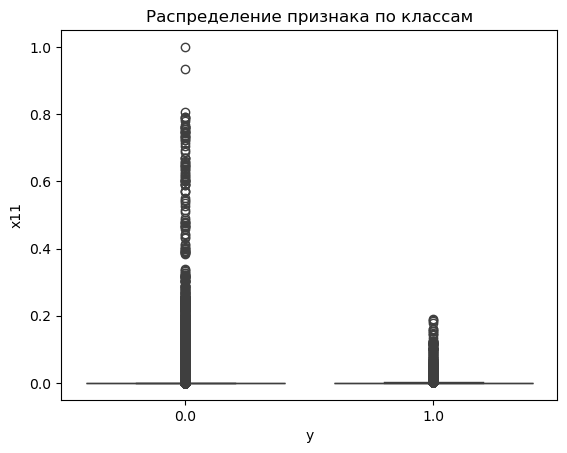

In [29]:
sns.boxplot(x='y', y='x11', data=df)
plt.title('Распределение признака по классам')
plt.show()

In [31]:
# Удаляем целевой столбец из анализа
features = [col for col in df.columns if col != 'y']

# Создаем список для хранения результатов
results = []

for feature in features:
    # Проверяем, что признак числовой
    if pd.api.types.is_numeric_dtype(df[feature]):
        stat, p_value = shapiro(df[feature].dropna())  # удаляем пропуски
        results.append({'Feature': feature, 'Shapiro_stat': stat, 'p_value': p_value})
    else:
        # Можно пропускать категориальные или вывести специальное сообщение
        results.append({'Feature': feature, 'Shapiro_stat': None, 'p_value': None, 'Note': 'Not numeric'})

# Создаем DataFrame из результатов
results_df = pd.DataFrame(results)

# Сортируем по p-value (от самых маленьких к большим)
results_df = results_df.sort_values(by='p_value')

# Вывод таблицы
print(results_df)

C:\Program Files\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 391650.
  res = hypotest_fun_out(*samples, **kwds)


                 Feature  Shapiro_stat        p_value         Note
5                     x1      0.012229  5.611022e-220          NaN
6                     x2      0.035776  4.888945e-219          NaN
8                     x4      0.073984  1.820304e-217          NaN
12                    x8      0.079156  3.001331e-217          NaN
9                     x5      0.082638  4.208319e-217          NaN
15                   x11      0.086923  6.389914e-217          NaN
14                   x10      0.095541  1.488228e-216          NaN
10                    x6      0.097778  1.855621e-216          NaN
11                    x7      0.099773  2.260285e-216          NaN
13                    x9      0.108519  5.390652e-216          NaN
7                     x3      0.114827  1.013997e-215          NaN
16                   x12      0.562897  2.466370e-189          NaN
4   relative_date_number      0.952961  2.181658e-117          NaN
0                  index      0.954216  1.273499e-116         

На основе теста Шапиро-Уилка можно сказать, что наши признаки не распределены нормально

In [34]:
# Получаем список признаков, исключая целевую переменную
features = [col for col in df.columns if col != 'y']

results = []

for feature in features:
    # Проверяем, что признак числовой
    if pd.api.types.is_numeric_dtype(df[feature]):
        group0 = df[df['y'] == 0][feature].dropna()
        group1 = df[df['y'] == 1][feature].dropna()

        # Выполняем тест Манна-Уитни
        stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
        results.append({'Feature': feature, 'U_stat': stat, 'p_value': p_value})
    else:
        results.append({'Feature': feature, 'U_stat': None, 'p_value': None, 'Note':'Not numeric'})

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Сортируем по p-value (от самых маленьких к большим)
results_df = results_df.sort_values(by='p_value')

# Выводим таблицу
print(results_df)

                 Feature        U_stat       p_value         Note
5                     x1  2.838120e+09  0.000000e+00          NaN
6                     x2  2.815491e+09  0.000000e+00          NaN
7                     x3  2.824869e+09  0.000000e+00          NaN
8                     x4  2.416038e+09  0.000000e+00          NaN
9                     x5  2.425220e+09  0.000000e+00          NaN
10                    x6  2.753597e+09  0.000000e+00          NaN
11                    x7  2.676414e+09  0.000000e+00          NaN
12                    x8  2.650594e+09  0.000000e+00          NaN
13                    x9  2.809917e+09  0.000000e+00          NaN
14                   x10  2.262556e+09  0.000000e+00          NaN
15                   x11  2.512724e+09  0.000000e+00          NaN
16                   x12  2.392735e+09  0.000000e+00          NaN
4   relative_date_number  3.124304e+09  5.850537e-73          NaN
3                     g2  3.635577e+09  1.065856e-59          NaN
2         

Согласно результатам теста Манна-Уитни, p-значения равны 0. Это означает, что гипотеза о равенстве распределений для признаков в двух группах отвергается с очень высокой статистической значимостью.

In [37]:
df_a = df.drop(['relative_date_number', 'g2', 'g1', 'id', 'index' ], axis=1)
df_a

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000001,0.000005,0.000016,0.000008,4.501503e-07,0.0,0.000003,0.000094,1.0
4,0.0,0.0,0.0,0.0,0.000003,0.000005,0.000047,0.000025,4.051353e-06,0.0,0.000003,0.000071,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391646,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391647,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0
391648,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0


Поскольку корреляция между признаками и таргетом крайне низкая, пробуем добавить новые признаки

In [39]:
# Выделяем признаки (x1-x12)
X = df_a[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']]

# Инициализируем PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Получаем имена новых признаков
feature_names = poly.get_feature_names_out(X.columns)

# Создаем DataFrame с новыми признаками
df_new_features = pd.DataFrame(X_poly, columns=feature_names)

# Объединяем с исходным датасетом
df_a_extended = pd.concat([df_a, df_new_features], axis=1)

In [41]:
df_a_extended.corr()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^2,x9 x10,x9 x11,x9 x12,x10^2,x10 x11,x10 x12,x11^2,x11 x12,x12^2
y,1.000000,0.002223,0.021181,0.025150,0.020878,0.021689,0.014643,0.020666,0.005398,0.026247,...,0.014546,0.015467,0.001029,0.026247,0.006868,-0.002529,0.018806,-0.003814,-0.001723,0.137937
x1,0.002223,1.000000,0.186838,0.318376,0.252934,0.248530,0.342655,0.318676,0.296925,0.301704,...,0.188439,0.216722,0.106411,0.301704,0.201306,0.086536,0.289690,0.039224,0.106134,0.024150
x2,0.021181,0.186838,1.000000,0.623423,0.803479,0.784207,0.735084,0.788523,0.617850,0.706708,...,0.574124,0.770875,0.408254,0.706708,0.664358,0.360358,0.722673,0.254070,0.317167,0.042245
x3,0.025150,0.318376,0.623423,1.000000,0.661423,0.674246,0.829219,0.822277,0.679171,0.968664,...,0.696379,0.614170,0.447973,0.968664,0.482759,0.318417,0.688710,0.255617,0.416442,0.090956
x4,0.020878,0.252934,0.803479,0.661423,1.000000,0.980826,0.908051,0.939383,0.900695,0.749519,...,0.436642,0.728995,0.437700,0.749519,0.840015,0.541323,0.943246,0.348610,0.490030,0.067461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x10 x11,-0.002529,0.086536,0.360358,0.318417,0.541323,0.591379,0.516056,0.512316,0.526014,0.355411,...,0.233036,0.405102,0.742841,0.355411,0.598366,1.000000,0.593121,0.846999,0.776863,0.020142
x10 x12,0.018806,0.289690,0.722673,0.688710,0.943246,0.951293,0.930329,0.943030,0.880842,0.756144,...,0.430426,0.697820,0.443766,0.756144,0.824762,0.593121,1.000000,0.376492,0.582662,0.079506
x11^2,-0.003814,0.039224,0.254070,0.255617,0.348610,0.394430,0.360464,0.353434,0.342252,0.269687,...,0.160352,0.243108,0.802317,0.269687,0.333611,0.846999,0.376492,1.000000,0.833711,0.016626
x11 x12,-0.001723,0.106134,0.317167,0.416442,0.490030,0.553568,0.548550,0.535955,0.514250,0.428663,...,0.193638,0.297430,0.695162,0.428663,0.405613,0.776863,0.582662,0.833711,1.000000,0.079935


In [42]:
df_a_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391650 entries, 0 to 391649
Columns: 103 entries, y to x12^2
dtypes: float64(103)
memory usage: 307.8 MB


In [95]:
X = df_a_extended.drop('y', axis=1)
y = df_a_extended['y']

Сбалансируем классы с помощью SMOTE

In [97]:
smote = SMOTE(sampling_strategy='minority')  
X_resampled, y_resampled = smote.fit_resample(X, y)

Делим датасет на тренировочную и тестовую выборки

In [105]:
X_resampled.columns = [f'feature_{i}' for i in range(X.shape[1])]

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42
)

Обучаем модель

In [107]:
binary_y = (y_train == 1).astype(int)
model_detector = CatBoostClassifier()
model_detector.fit(X_train, binary_y)

Learning rate set to 0.149173
0:	learn: 0.6058751	total: 91.1ms	remaining: 1m 31s
1:	learn: 0.5748286	total: 173ms	remaining: 1m 26s
2:	learn: 0.5698764	total: 267ms	remaining: 1m 28s
3:	learn: 0.5610442	total: 349ms	remaining: 1m 26s
4:	learn: 0.5530250	total: 432ms	remaining: 1m 25s
5:	learn: 0.5458252	total: 519ms	remaining: 1m 25s
6:	learn: 0.5436184	total: 591ms	remaining: 1m 23s
7:	learn: 0.5364484	total: 688ms	remaining: 1m 25s
8:	learn: 0.5341253	total: 767ms	remaining: 1m 24s
9:	learn: 0.5324820	total: 838ms	remaining: 1m 22s
10:	learn: 0.5272002	total: 923ms	remaining: 1m 22s
11:	learn: 0.5257864	total: 992ms	remaining: 1m 21s
12:	learn: 0.5147716	total: 1.09s	remaining: 1m 22s
13:	learn: 0.5105818	total: 1.19s	remaining: 1m 24s
14:	learn: 0.5041666	total: 1.3s	remaining: 1m 25s
15:	learn: 0.4964919	total: 1.4s	remaining: 1m 25s
16:	learn: 0.4851620	total: 1.5s	remaining: 1m 26s
17:	learn: 0.4817825	total: 1.6s	remaining: 1m 27s
18:	learn: 0.4778287	total: 1.68s	remaining: 1m

In [109]:
preds_detector = model_detector.predict(X_test)

In [165]:
y_test_binary = (y_test == 1).astype(int)

# Предсказания вероятностей (чтобы выбрать порог, например 0.5)
preds_probs = model_detector.predict_proba(X_test)[:, 1]

# Бинарные предсказания по порогу 0.5
preds_binary = (preds_probs >= 0.5).astype(int)

# Метрики
print(classification_report(y_test_binary, preds_binary))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    112044
           1       0.93      0.93      0.93    112044

    accuracy                           0.93    224088
   macro avg       0.93      0.93      0.93    224088
weighted avg       0.93      0.93      0.93    224088



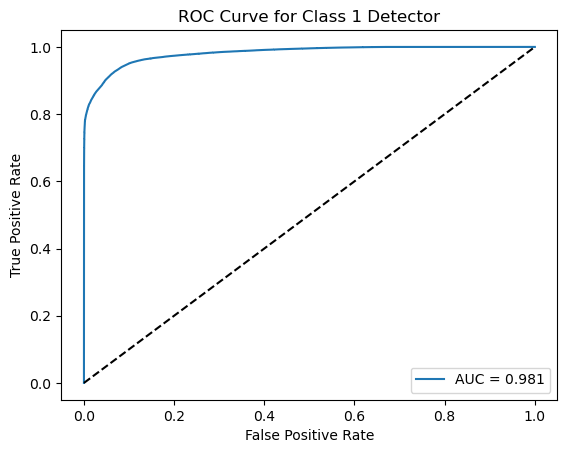

In [174]:
fpr, tpr, thresholds = roc_curve(y_test_binary, preds_probs)
auc_score = roc_auc_score(y_test_binary, preds_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1 Detector')
plt.legend()
plt.show()

## Считаем модель на тестовых данных

In [276]:
df_test = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Соревнование\test.csv')

In [176]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262605 entries, 0 to 262604
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    262605 non-null  object 
 1   g1                    262605 non-null  int64  
 2   g2                    262605 non-null  int64  
 3   relative_date_number  262605 non-null  int64  
 4   x1                    262605 non-null  float64
 5   x2                    262605 non-null  float64
 6   x3                    262605 non-null  float64
 7   x4                    262605 non-null  float64
 8   x5                    262605 non-null  float64
 9   x6                    262605 non-null  float64
 10  x7                    262605 non-null  float64
 11  x8                    262605 non-null  float64
 12  x9                    262605 non-null  float64
 13  x10                   262605 non-null  float64
 14  x11                   262605 non-null  float64
 15  

In [238]:
df_t = df_test.drop(['relative_date_number', 'g2', 'g1', 'id' ], axis=1)

In [232]:
X_t = df_t[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']]

# Инициализируем PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_t)

# Получаем имена новых признаков
feature_names = poly.get_feature_names_out(X_t.columns)

# Создаем DataFrame с новыми признаками
df_new_features = pd.DataFrame(X_poly, columns=feature_names)

# Объединяем с исходным датасетом
df_t_extended = pd.concat([df_t, df_new_features], axis=1)

In [256]:
df_t_extended.columns = [f'feature_{i}' for i in range(df_t_extended.shape[1])]

In [262]:
# Предсказания вероятностей (чтобы выбрать порог, например 0.5)
preds_probs = model_detector.predict_proba(df_t_extended)[:, 1]

# Бинарные предсказания по порогу 0.5
preds_binary = (preds_probs >= 0.5).astype(int)

In [278]:
df_test_new = df_test.drop(['relative_date_number', 'g2', 'g1','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12' ], axis=1)

df_test_new['prediction'] = preds_binary

# Сохраняем в файл
df_test_new.to_csv('test_predictions.csv', index=False)